# Cluster LP coeffs 

In [7]:
from psf_constants import TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          NUMPY_SUFFIX, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_LP_COEFFS_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [8]:
def plot_kneighbours(data, neighbours):
    nbrs = NearestNeighbors(n_neighbors=neighbours).fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Step 2: Sort and plot the distances
    distances = np.sort(distances[:, -1])
    plt.plot(distances)
    plt.ylabel(f"{neighbours}-NN Distance ")
    plt.xlabel("Points sorted by distance to nearest neighbours")
    plt.title(f"{neighbours}-NN Distance Graph")
    plt.show()

def get_number_of_clusters(data, epsilon, neighbours):
    dbscan = DBSCAN(eps=epsilon, min_samples=neighbours)
    labels = dbscan.fit_predict(data)
    #hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=neighbours)
    #labels = hdbscan_clusterer.fit_predict(data)
    print("Number of clusters:", np.max(labels)+1)
    mask = labels != -1
    points_that_are_not_noise = np.sum(mask)
    print(labels)
    print("Numbers that are not noise:", points_that_are_not_noise)
    
    return labels

def plot_cluster_labels_count(labels):

    non_noise_labels = labels[labels != -1]
    counter = Counter(non_noise_labels)
    most_common = counter.most_common()[0]
    least_common = counter.most_common()[:-2:-1][0]
    print(f"The most repeated label is {most_common[0]} with {most_common[1]} occurrences.")
    print(f"The least repeated label is {least_common[0]} with {least_common[1]} occurrence.")

    keys = list(counter.keys())
    counts = list(counter.values())

    print("Cluster density mean:", np.mean(counts))
    print("Cluster density variance:", np.std(counts))
    plt.bar(keys, counts)
    plt.xlabel('Label id')
    plt.ylabel('Frequency')
    plt.title('Label frequency in the clustering')
    plt.show()

def plot_psf_projection(psf_data, nmodes, dataset):
    #fig = plt.figure(figsize=(18,8))
    fig = plt.figure()
    x = psf_data[:, 0]
    y = psf_data[:, 1]
    z = psf_data[:, 2]
    
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='skyblue', marker='o', s=1, alpha=0.6)
    ax.set_title(f'{nmodes} Zernike modes {dataset} UMAP')
    
    #ax2 = fig.add_subplot(122, projection='3d')
    #ax2.scatter(x, y, z, c='skyblue', marker='o', s=1, alpha=0.6)
    #ax2.set_xlabel('X Label')
    #ax2.set_ylabel('Y Label')
    #ax2.set_zlabel('Z Label')
    #ax2.set_title('PSF UMAP')
    #ax2.view_init(elev=30, azim=120) 
    
    # Show the plot
    plt.show()
    
    fig.savefig(f"pid-{nmodes}m{dataset.replace(' ', '').lower()}umap")

def load_data(prefix):
    data_list = []
    for suffix in PSF_TRAIN_FILE_SUFFIXES:
        data_path = f"{prefix}{suffix}{NUMPY_SUFFIX}"
        subdata = np.load(data_path)
        data_list.append(subdata)
    data = np.concatenate(data_list)
    return data

### Analysis

#### 2 modes

In [3]:
zernike_2_data = load_data(TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX).reshape(70000,38)

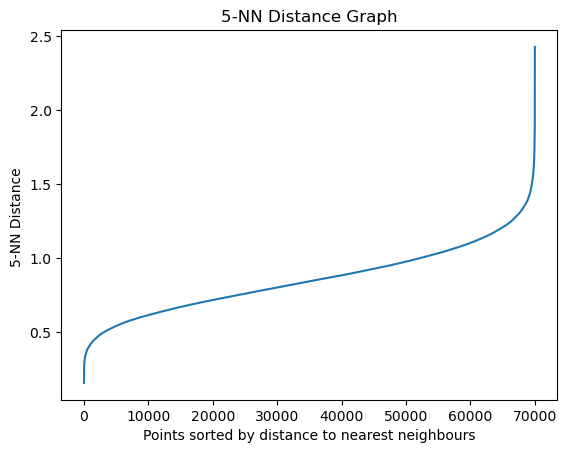

Number of clusters: 1470
[  0   1  -1 ... 368  -1   0]
Numbers that are not noise: 64686


In [4]:
n_neighbours = 5
plot_kneighbours(zernike_2_data, n_neighbours)
epsilon = 0.99
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 0 with 24180 occurrences.
The least repeated label is 1444 with 1 occurrence.
Cluster density mean: 44.00408163265306
Cluster density variance: 631.9145382540345


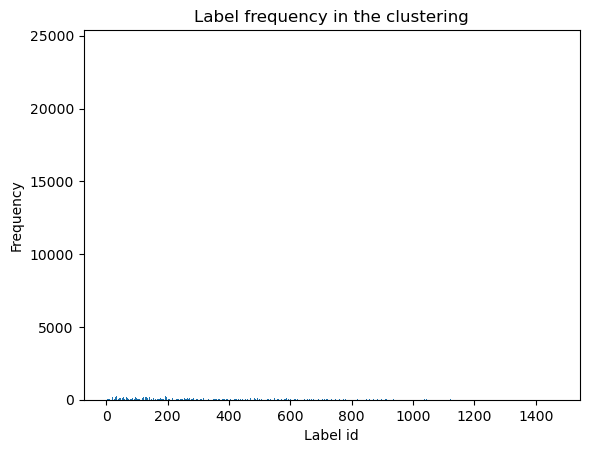

In [5]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

In [6]:
zernike_5_data = load_data(TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX).reshape(70000,38)

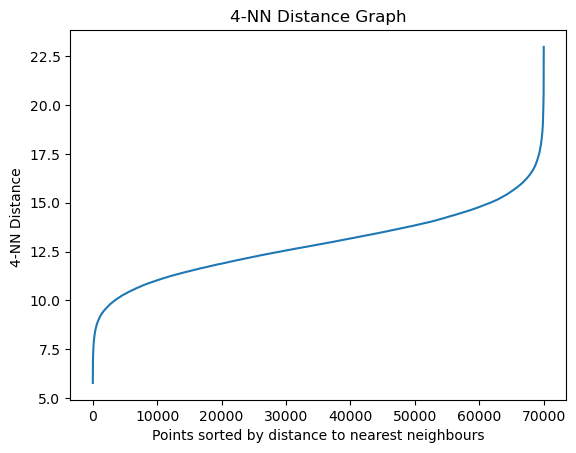

Number of clusters: 1551
[   1  814    0 ...    1    1 1144]
Numbers that are not noise: 54265


In [8]:
n_neighbours = 4
plot_kneighbours(zernike_5_data, n_neighbours)
epsilon = 12.8
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 1 with 43699 occurrences.
The least repeated label is 1446 with 1 occurrence.
Cluster density mean: 34.987105093488076
Cluster density variance: 1109.0874542325807


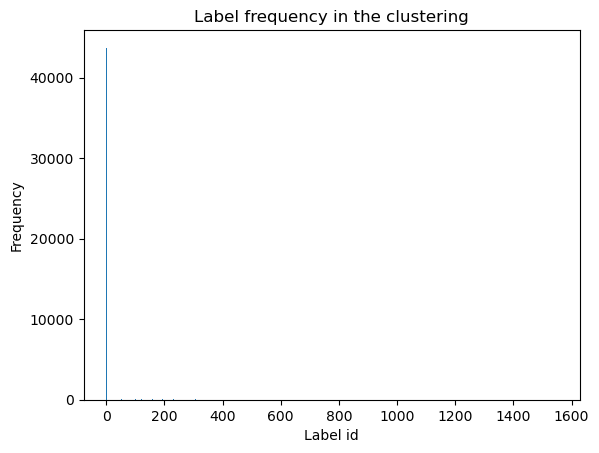

In [9]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

In [10]:
zernike_9_data = load_data(TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX).reshape(70000,38)

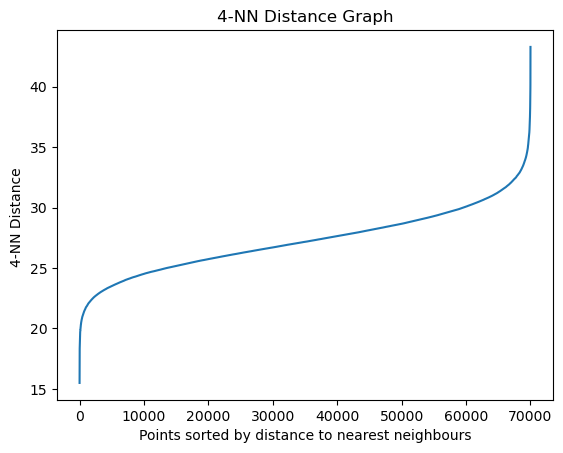

Number of clusters: 1549
[ 0 -1 -1 ...  0 -1 -1]
Numbers that are not noise: 43397


In [11]:
n_neighbours = 4
plot_kneighbours(zernike_9_data, n_neighbours)
epsilon = 26
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 0 with 35029 occurrences.
The least repeated label is 1485 with 1 occurrence.
Cluster density mean: 28.0161394448031
Cluster density variance: 889.608455300477


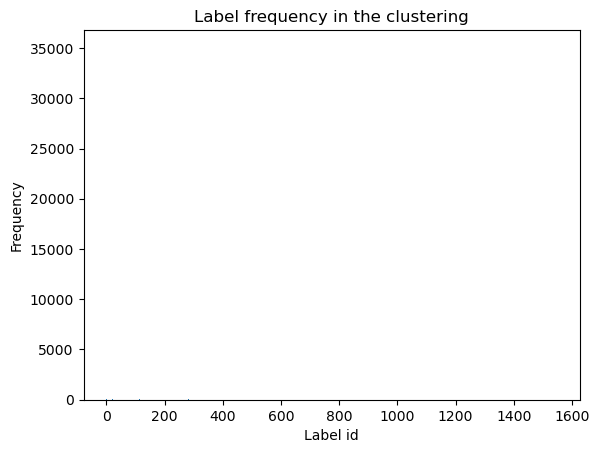

In [12]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

In [13]:
zernike_14_data = load_data(TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX).reshape(70000,38)

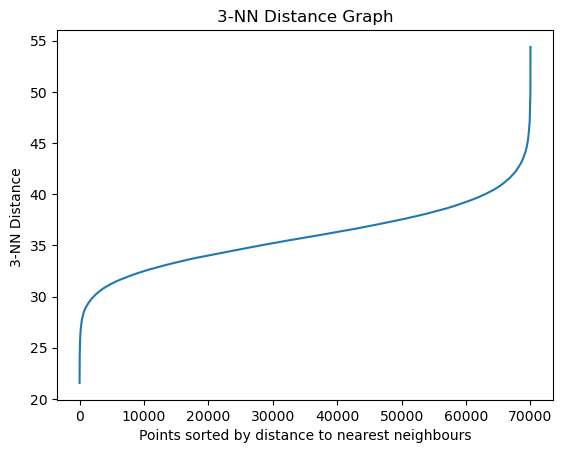

Number of clusters: 1445
[ 0 -1  0 ...  0  0  0]
Numbers that are not noise: 46626


In [14]:
n_neighbours = 3
plot_kneighbours(zernike_14_data, n_neighbours)
epsilon = 35.5
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 0 with 40490 occurrences.
The least repeated label is 1418 with 3 occurrence.
Cluster density mean: 32.26712802768166
Cluster density variance: 1064.679390274435


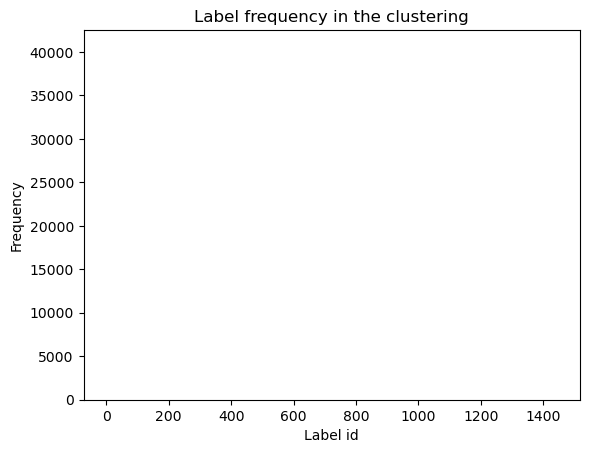

In [15]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

In [16]:
zernike_20_data = load_data(TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX).reshape(70000,38)

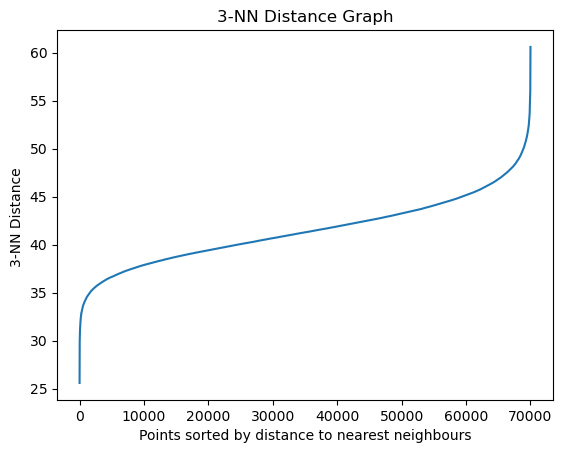

Number of clusters: 1558
[-1  0 -1 ... -1  0 -1]
Numbers that are not noise: 38079


In [17]:
n_neighbours=3
plot_kneighbours(zernike_20_data, n_neighbours)
epsilon = 40.05
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 0 with 31641 occurrences.
The least repeated label is 1462 with 3 occurrence.
Cluster density mean: 24.440949935815148
Cluster density variance: 801.2570275365835


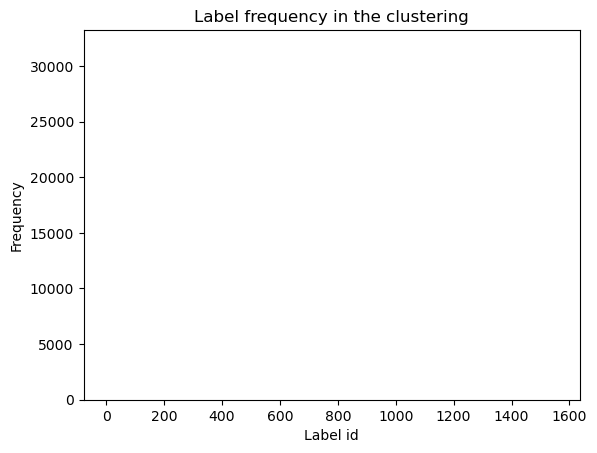

In [18]:
plot_cluster_labels_count(labels_20m)

### Save clusters

In [19]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_20m)

# Cluster Output Fluxes

In [3]:
from psf_constants import TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH

from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [7]:
zernike_2_data = load_data(TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX)
zernike_5_data = load_data(TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX)
zernike_9_data = load_data(TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX)
zernike_14_data = load_data(TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX)
zernike_20_data = load_data(TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX)

### Analysis

#### 2 modes

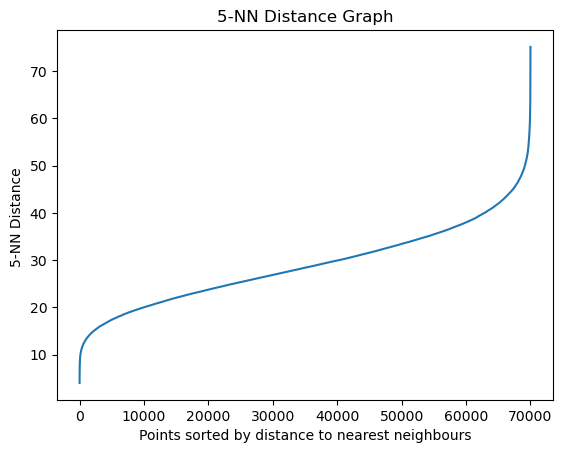

Number of clusters: 1431
[  0   1  -1 ... 340  -1   0]
Numbers that are not noise: 65065


In [26]:
n_neighbours = 5
plot_kneighbours(zernike_2_data, n_neighbours)
epsilon = 34.7
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 0 with 27899 occurrences.
The least repeated label is 1310 with 1 occurrence.
Cluster density mean: 45.468204053109716
Cluster density variance: 739.7809628722216


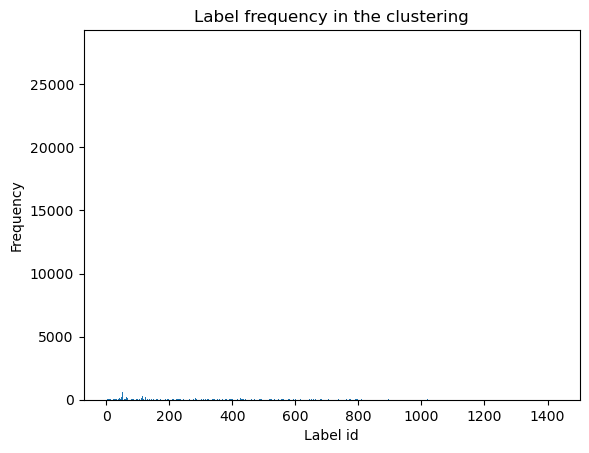

In [27]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

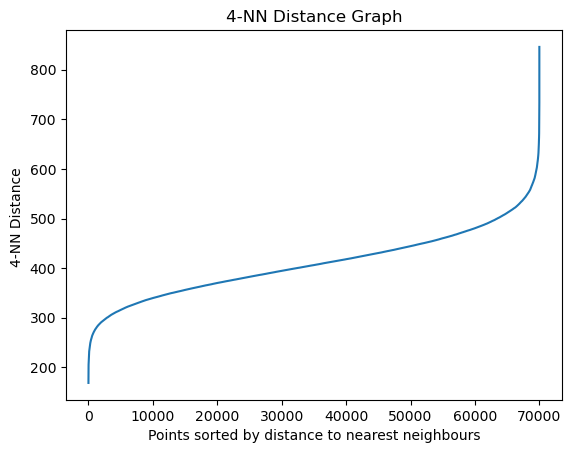

Number of clusters: 1500
[ 721   -1    0 ...    0  148 1499]
Numbers that are not noise: 53324


In [36]:
n_neighbours = 4
plot_kneighbours(zernike_5_data, n_neighbours)
epsilon = 410
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 0 with 43844 occurrences.
The least repeated label is 1499 with 1 occurrence.
Cluster density mean: 35.54933333333334
Cluster density variance: 1131.519279361259


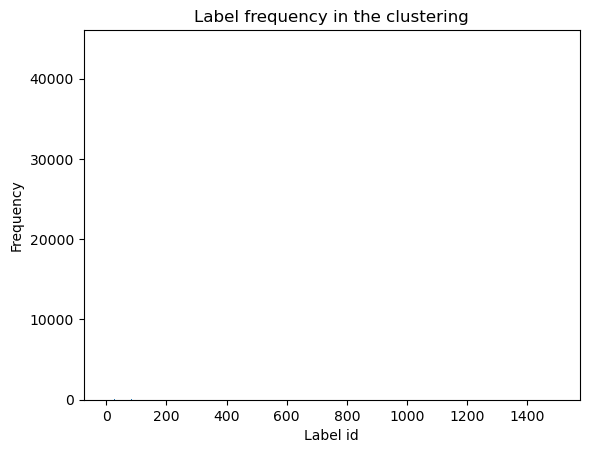

In [37]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

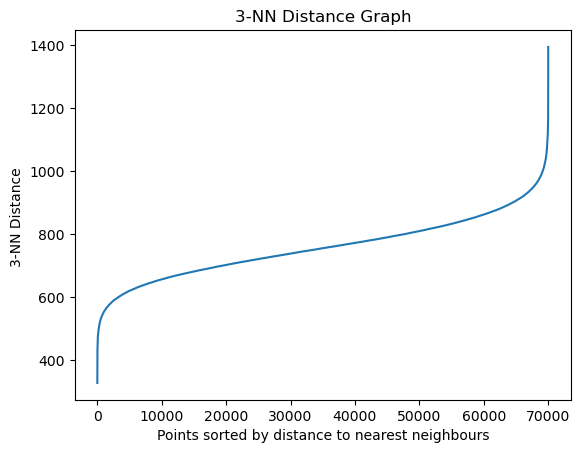

Number of clusters: 1616
[ 0  0  0 ...  0 -1  0]
Numbers that are not noise: 51474


In [47]:
n_neighbours = 3
plot_kneighbours(zernike_9_data, n_neighbours)
epsilon = 770
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 0 with 44224 occurrences.
The least repeated label is 1532 with 3 occurrence.
Cluster density mean: 31.85272277227723
Cluster density variance: 1099.6649852544033


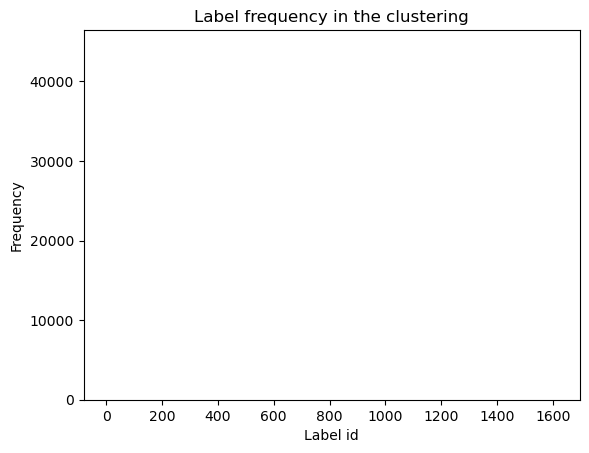

In [48]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

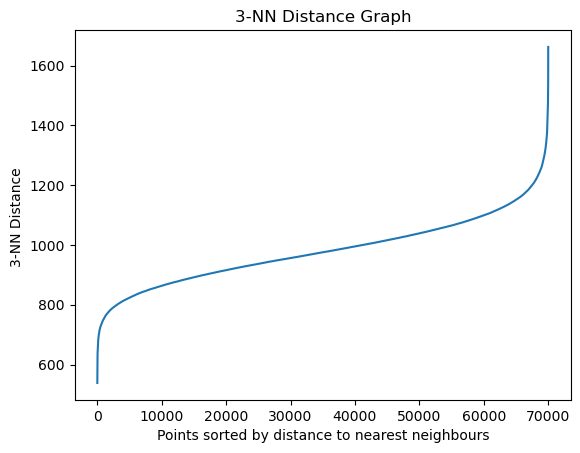

Number of clusters: 1669
[   0    0   36 ...   -1    0 1668]
Numbers that are not noise: 40577


In [56]:
n_neighbours = 3
plot_kneighbours(zernike_14_data, n_neighbours)
epsilon = 950
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 0 with 33287 occurrences.
The least repeated label is 1627 with 3 occurrence.
Cluster density mean: 24.312162971839424
Cluster density variance: 814.4481862160493


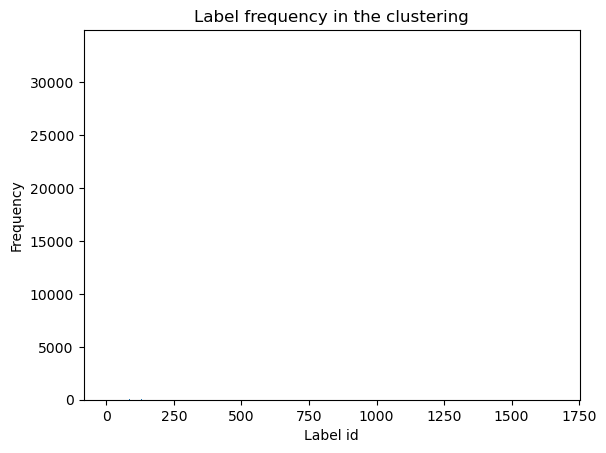

In [57]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

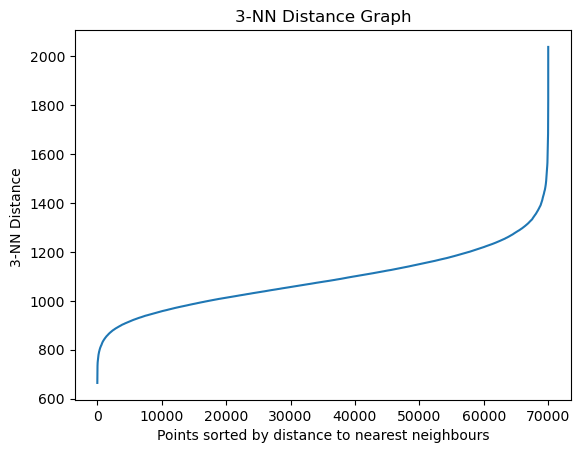

Number of clusters: 1647
[-1  0 -1 ... -1  0 -1]
Numbers that are not noise: 30067


In [62]:
n_neighbours = 3
plot_kneighbours(zernike_20_data, n_neighbours)
epsilon = 1010
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 0 with 22982 occurrences.
The least repeated label is 1625 with 3 occurrence.
Cluster density mean: 18.255616272009714
Cluster density variance: 566.0194618557595


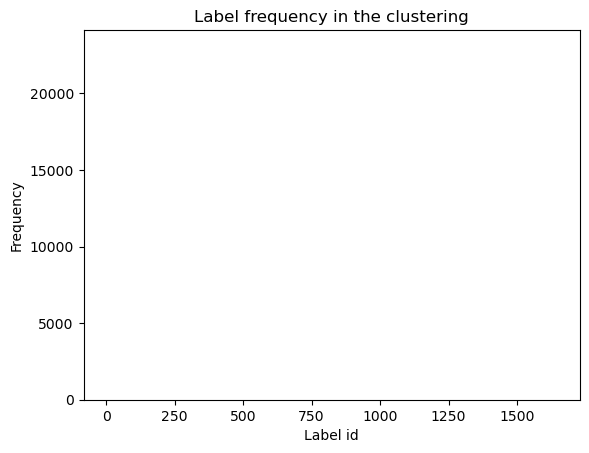

In [63]:
plot_cluster_labels_count(labels_20m)

In [37]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_20m)

# Cluster Zernike mode coefficients

In [3]:
from psf_constants import TRAIN_2M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX, \
                          TRAIN_5M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX, \
                          TRAIN_9M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX, \
                          TRAIN_14M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX, \
                          TRAIN_20M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_COEFFS_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [4]:
zernike_2_data = load_data(TRAIN_2M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX)
zernike_5_data = load_data(TRAIN_5M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX)
zernike_9_data = load_data(TRAIN_9M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX)
zernike_14_data = load_data(TRAIN_14M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX)
zernike_20_data = load_data(TRAIN_20M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX)

#### 2 modes

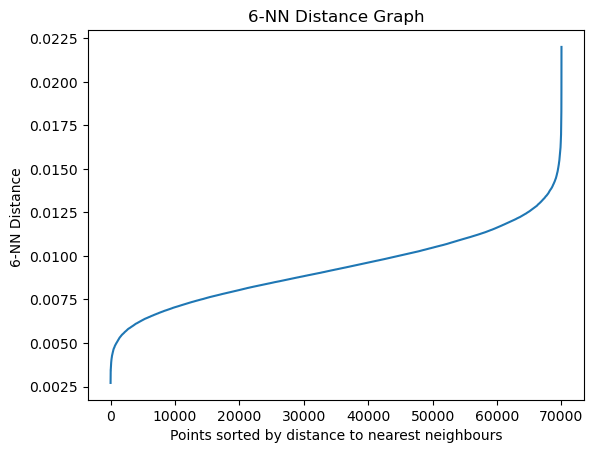

Number of clusters: 1535
[  0 386 469 ... 678  -1  13]
Numbers that are not noise: 63130


In [5]:
n_neighbours = 6
plot_kneighbours(zernike_2_data, n_neighbours)
epsilon = 0.01
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 1 with 1669 occurrences.
The least repeated label is 1417 with 1 occurrence.
Cluster density mean: 41.127035830618894
Cluster density variance: 92.65471690896693


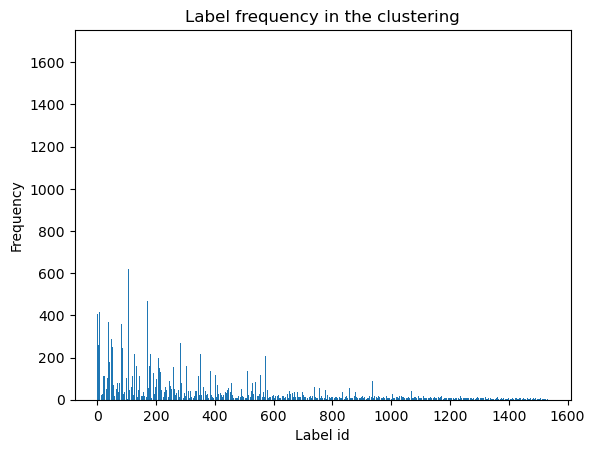

In [6]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

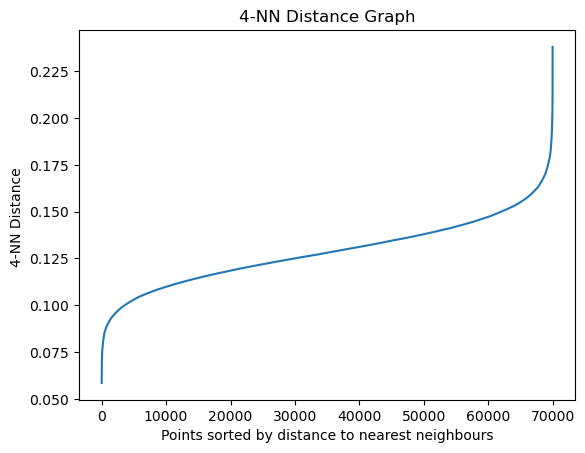

Number of clusters: 1448
[   1  764    0 ...    1    1 1095]
Numbers that are not noise: 55183


In [7]:
n_neighbours = 4
plot_kneighbours(zernike_5_data, n_neighbours)
epsilon = 0.128
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 1 with 45845 occurrences.
The least repeated label is 1343 with 1 occurrence.
Cluster density mean: 38.10980662983425
Cluster density variance: 1204.209591971241


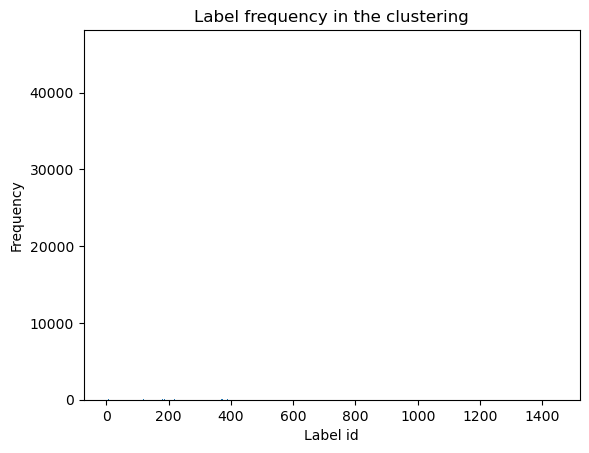

In [8]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

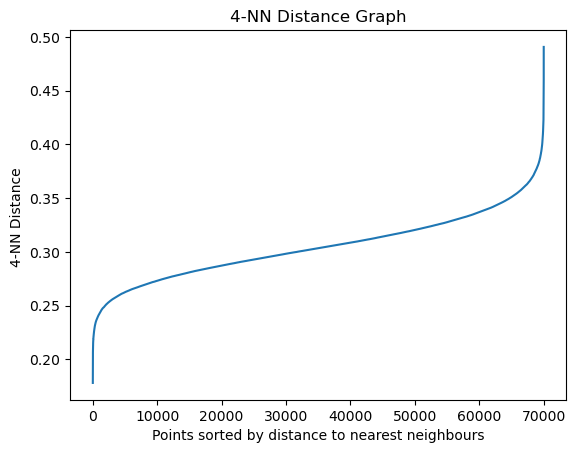

Number of clusters: 1428
[  -1    0    0 ... 1000   -1   -1]
Numbers that are not noise: 43275


In [9]:
n_neighbours = 4
plot_kneighbours(zernike_9_data, n_neighbours)
epsilon = 0.29
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 0 with 36063 occurrences.
The least repeated label is 1244 with 1 occurrence.
Cluster density mean: 30.304621848739497
Cluster density variance: 953.8652344523549


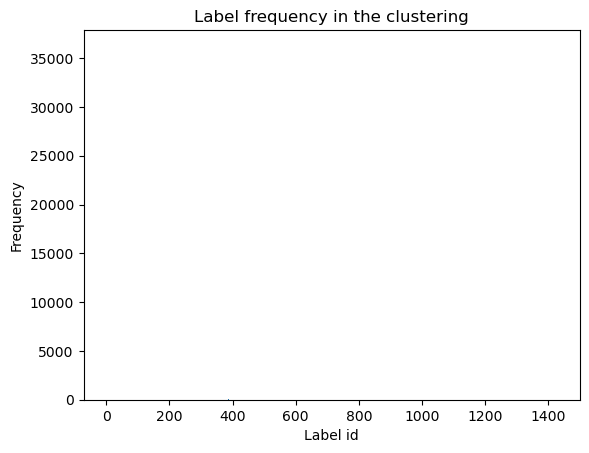

In [10]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

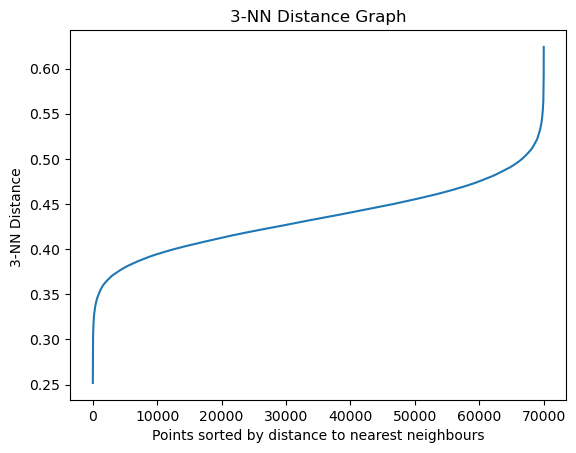

Number of clusters: 1639
[-1 -1  0 ...  1  1 -1]
Numbers that are not noise: 42439


In [11]:
n_neighbours = 3
plot_kneighbours(zernike_14_data, n_neighbours)
epsilon = 0.424
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 1 with 35676 occurrences.
The least repeated label is 1620 with 3 occurrence.
Cluster density mean: 25.893227577791336
Cluster density variance: 880.8558897020064


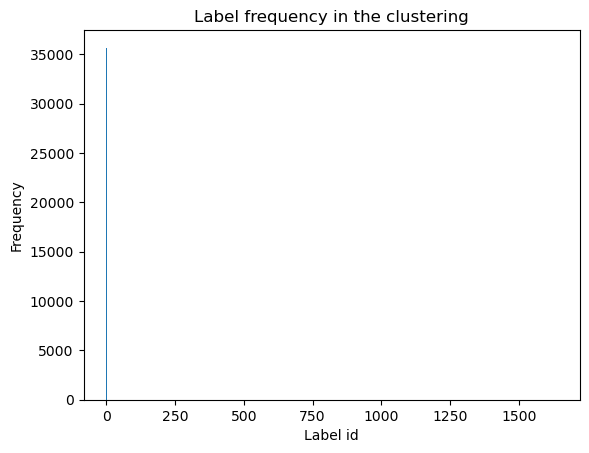

In [12]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

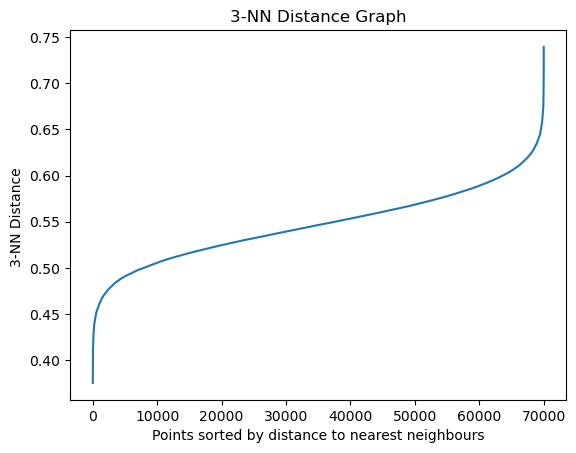

Number of clusters: 1431
[  0   1 103 ...   0  -1   0]
Numbers that are not noise: 37668


In [13]:
n_neighbours = 3
plot_kneighbours(zernike_20_data, n_neighbours)
epsilon = 0.53
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 0 with 31856 occurrences.
The least repeated label is 1333 with 3 occurrence.
Cluster density mean: 26.32285115303983
Cluster density variance: 841.7153664399654


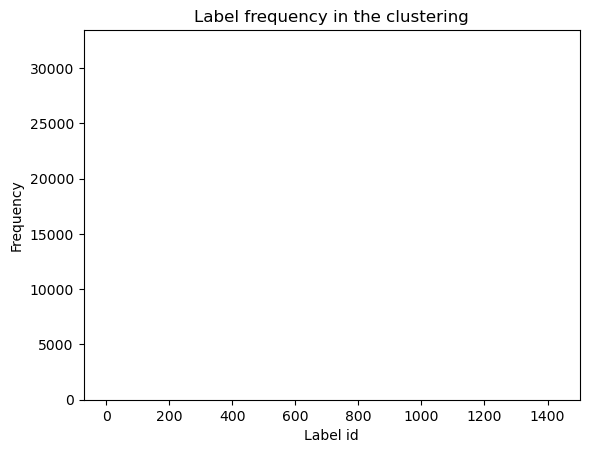

In [14]:
plot_cluster_labels_count(labels_20m)

In [15]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_COEFFS_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_COEFFS_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_COEFFS_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_COEFFS_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_COEFFS_FILE_PATH, labels_20m)

# Cluster Low Dimensionality PSF electric field

In [27]:
from psf_constants import LOW_DIMENSION_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_PSF_FILE_PATH



from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [28]:
zernike_2_data = np.load(LOW_DIMENSION_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSION_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSION_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSION_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSION_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)

#### 2 modes

In [29]:
n_neighbours = 5
epsilon = 0.154

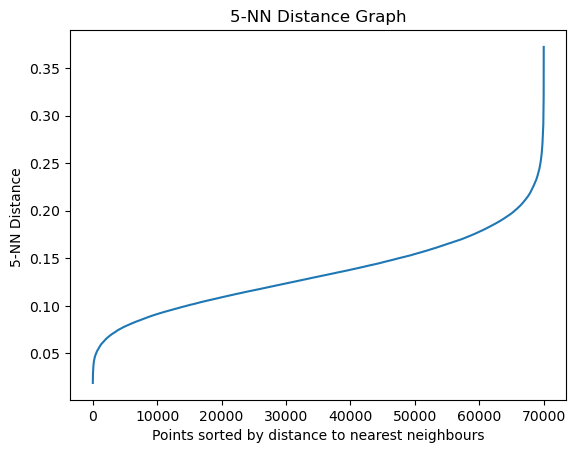

In [30]:
plot_kneighbours(zernike_2_data, n_neighbours)

In [31]:
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

Number of clusters: 1563
[  0   1  -1 ...  32 218 359]
Numbers that are not noise: 62774


The most repeated label is 7 with 1998 occurrences.
The least repeated label is 1135 with 1 occurrence.
Cluster density mean: 40.16250799744082
Cluster density variance: 110.41744997262538


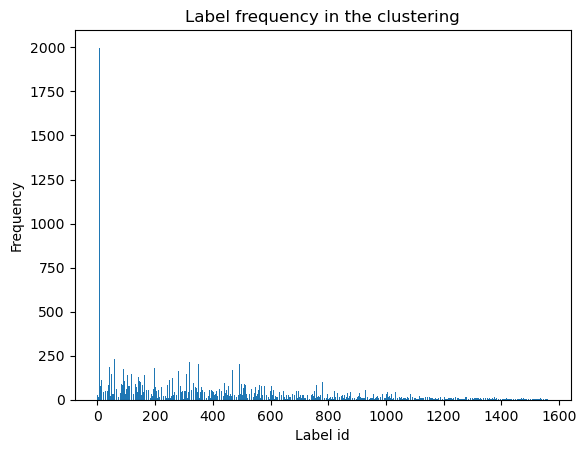

In [32]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

In [33]:
n_neighbours = 4
epsilon = 0.31

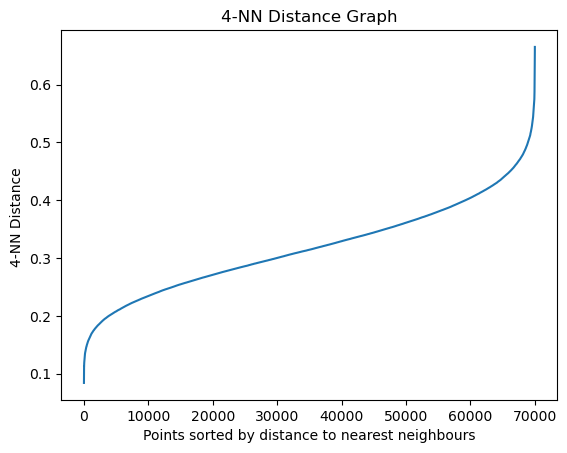

In [34]:
plot_kneighbours(zernike_5_data, n_neighbours)

In [35]:
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

Number of clusters: 1587
[ -1  -1   0 ...   0 987   0]
Numbers that are not noise: 46065


The most repeated label is 0 with 34362 occurrences.
The least repeated label is 933 with 1 occurrence.
Cluster density mean: 29.02646502835539
Cluster density variance: 862.1407701496145


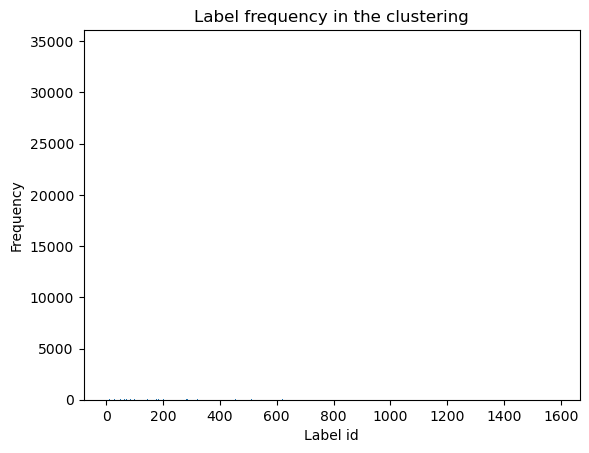

In [36]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

In [37]:
n_neighbours = 4
epsilon = 0.26

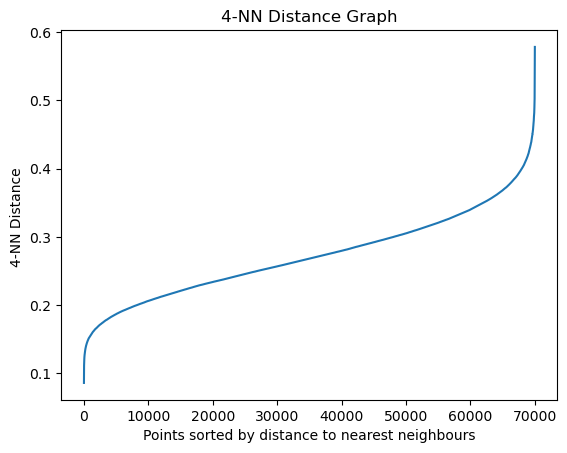

In [38]:
plot_kneighbours(zernike_9_data, n_neighbours)

In [39]:
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

Number of clusters: 1459
[ 0  0  1 ... -1 45  0]
Numbers that are not noise: 44429


The most repeated label is 0 with 34186 occurrences.
The least repeated label is 1373 with 1 occurrence.
Cluster density mean: 30.451679232350926
Cluster density variance: 894.5697536251822


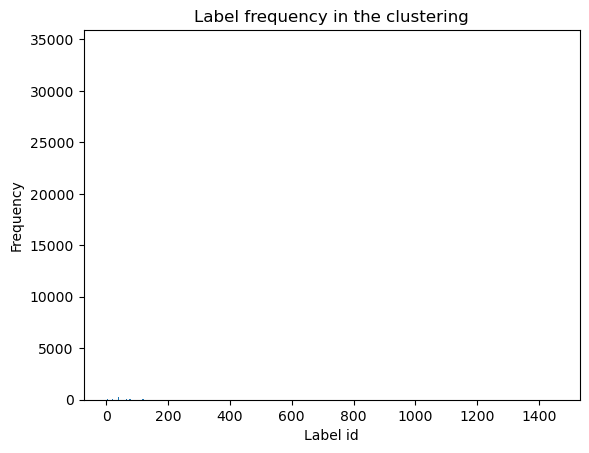

In [40]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

In [41]:
n_neighbours = 4
epsilon = 0.25

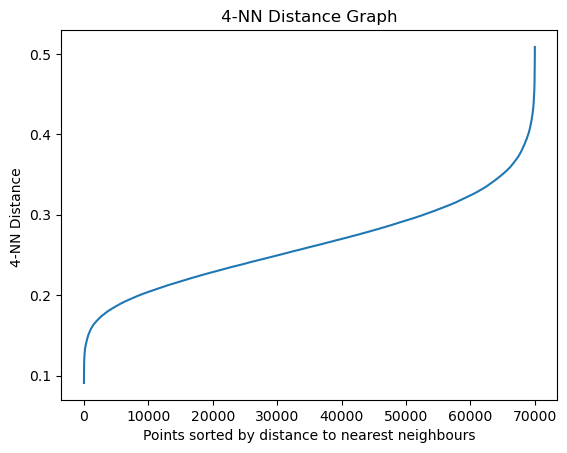

In [42]:
plot_kneighbours(zernike_14_data, n_neighbours)

In [43]:
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

Number of clusters: 1607
[ 0  0 -1 ...  0 -1 -1]
Numbers that are not noise: 44202


The most repeated label is 0 with 33334 occurrences.
The least repeated label is 1564 with 1 occurrence.
Cluster density mean: 27.505911636589918
Cluster density variance: 831.1353147629292


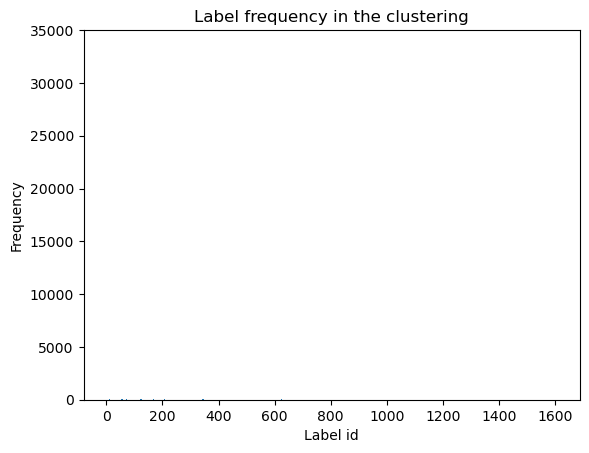

In [44]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

In [45]:
n_neighbours = 4
epsilon = 0.25

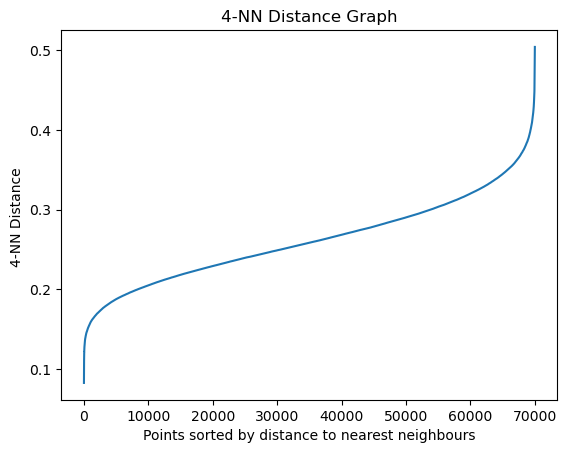

In [46]:
plot_kneighbours(zernike_20_data, n_neighbours)

In [47]:
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

Number of clusters: 1621
[-1  0  1 ... -1 -1 -1]
Numbers that are not noise: 45175


The most repeated label is 0 with 34332 occurrences.
The least repeated label is 1074 with 1 occurrence.
Cluster density mean: 27.868599629858114
Cluster density variance: 852.3289352273929


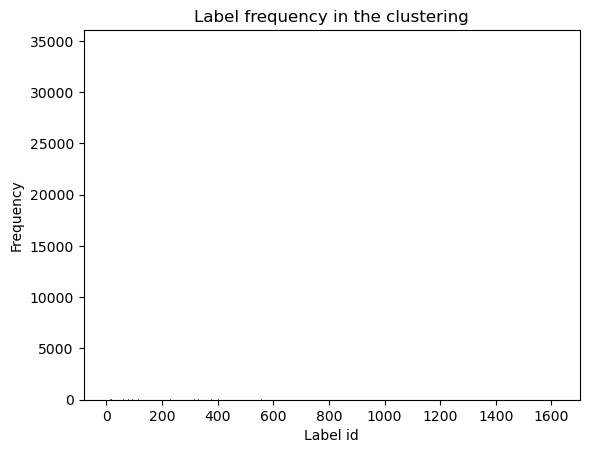

In [48]:
plot_cluster_labels_count(labels_20m)

In [49]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_PSF_FILE_PATH, labels_20m)

# Cluster Low Dimensionality PSF Intensity

In [9]:
from psf_constants import LOW_DIMENSION_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_PSF_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_PSF_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_PSF_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_PSF_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_PSF_INTENSITY_FILE_PATH



from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [10]:
zernike_2_data = np.load(LOW_DIMENSION_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSION_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSION_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSION_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSION_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH)

#### 2 modes

In [11]:
n_neighbours = 5
epsilon = 0.154

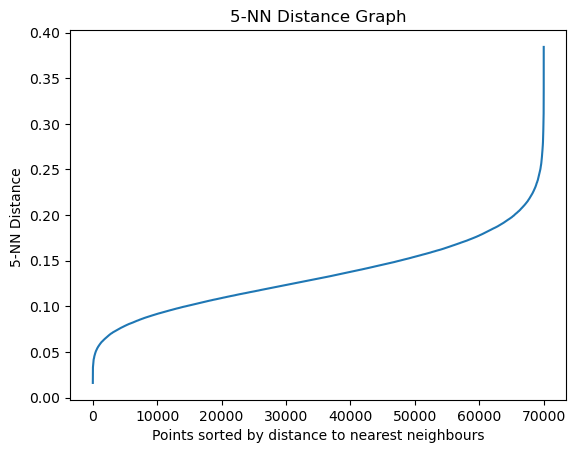

In [12]:
plot_kneighbours(zernike_2_data, n_neighbours)

In [13]:
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

Number of clusters: 1608
[  0   1   2 ... 130 227 533]
Numbers that are not noise: 62843


The most repeated label is 136 with 1794 occurrences.
The least repeated label is 1489 with 1 occurrence.
Cluster density mean: 39.08146766169154
Cluster density variance: 101.88688223211219


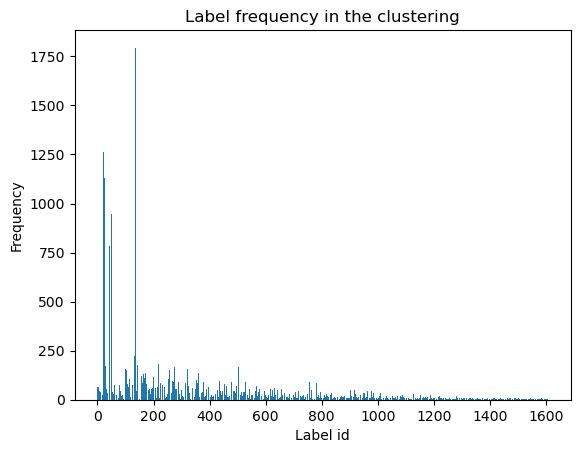

In [14]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

In [15]:
n_neighbours = 4
epsilon = 0.31

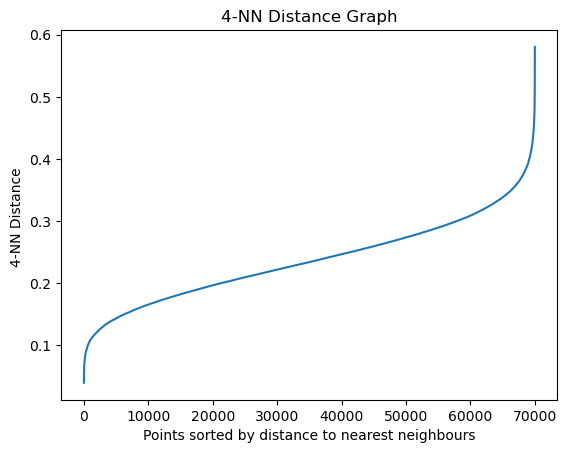

In [16]:
plot_kneighbours(zernike_5_data, n_neighbours)

In [17]:
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

Number of clusters: 226
[0 0 0 ... 0 0 0]
Numbers that are not noise: 66601


The most repeated label is 0 with 65210 occurrences.
The least repeated label is 204 with 1 occurrence.
Cluster density mean: 294.6946902654867
Cluster density variance: 4327.689877090628


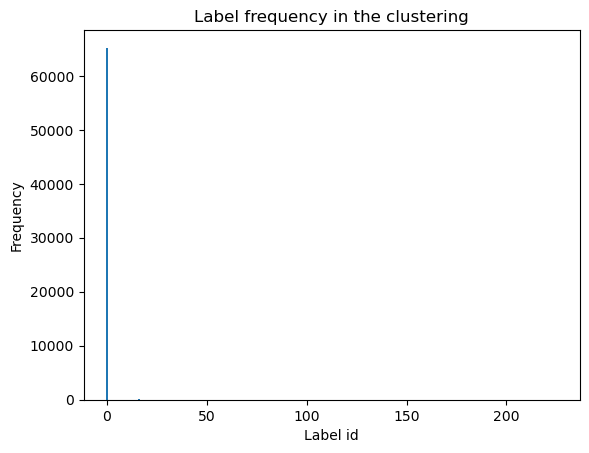

In [18]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

In [19]:
n_neighbours = 4
epsilon = 0.26

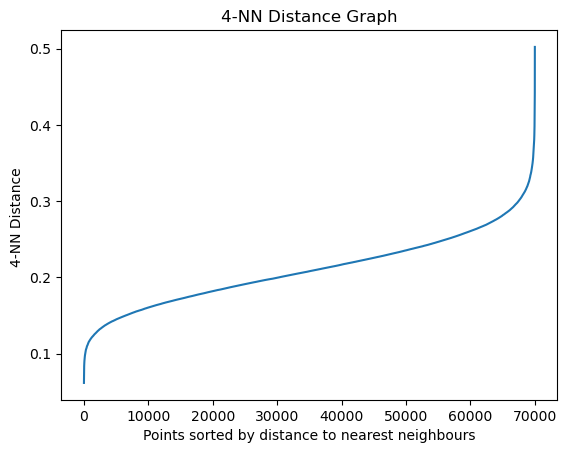

In [20]:
plot_kneighbours(zernike_9_data, n_neighbours)

In [21]:
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

Number of clusters: 244
[0 0 0 ... 0 0 0]
Numbers that are not noise: 66772


The most repeated label is 0 with 65422 occurrences.
The least repeated label is 220 with 1 occurrence.
Cluster density mean: 273.655737704918
Cluster density variance: 4179.269724564783


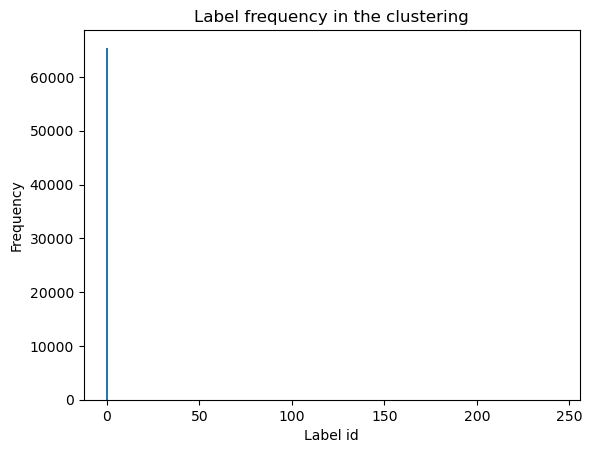

In [22]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

In [23]:
n_neighbours = 4
epsilon = 0.25

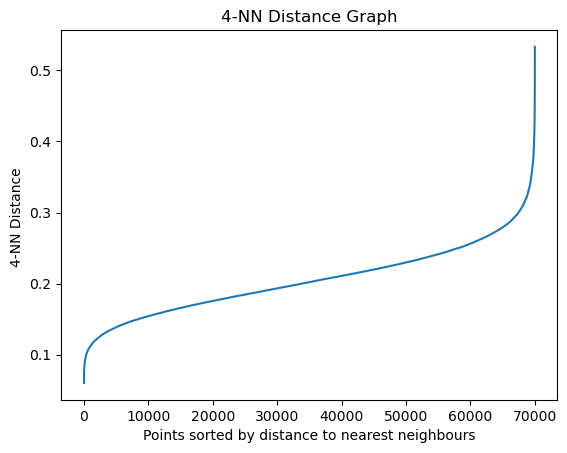

In [24]:
plot_kneighbours(zernike_14_data, n_neighbours)

In [25]:
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

Number of clusters: 379
[0 0 0 ... 0 0 0]
Numbers that are not noise: 65505


The most repeated label is 0 with 63220 occurrences.
The least repeated label is 350 with 1 occurrence.
Cluster density mean: 172.83641160949867
Cluster density variance: 3242.7986983531605


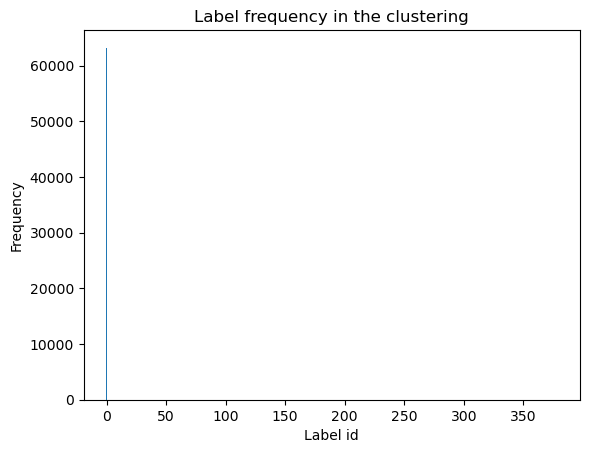

In [26]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

In [27]:
n_neighbours = 4
epsilon = 0.25

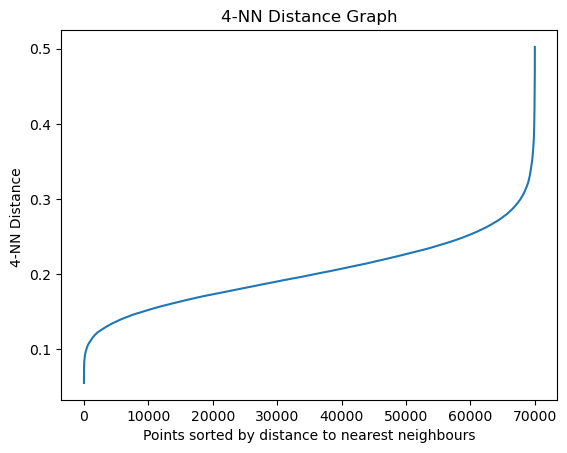

In [28]:
plot_kneighbours(zernike_20_data, n_neighbours)

In [29]:
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

Number of clusters: 307
[0 0 0 ... 0 0 0]
Numbers that are not noise: 65983


The most repeated label is 0 with 64290 occurrences.
The least repeated label is 264 with 1 occurrence.
Cluster density mean: 214.928338762215
Cluster density variance: 3662.9295916740925


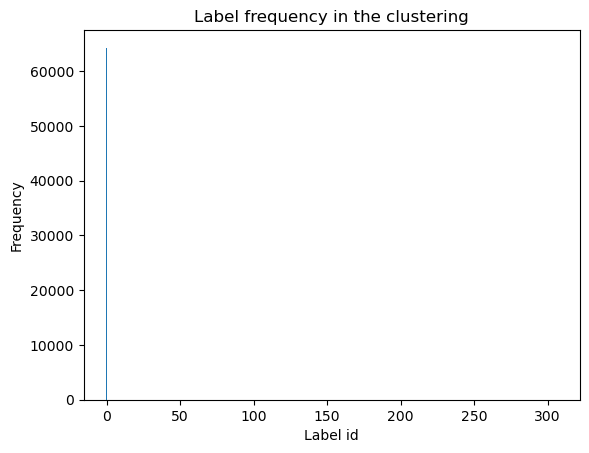

In [30]:
plot_cluster_labels_count(labels_20m)

In [31]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_20m)

# Cluster Low Dimensionality Predicted PSF electric field

In [61]:
from psf_constants import LOW_DIMENSIONALITY_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_20M_ZERNIKE_PSF_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [62]:
zernike_2_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)

#### 2 modes

In [63]:
n_neighbours = 5
epsilon = 0.157

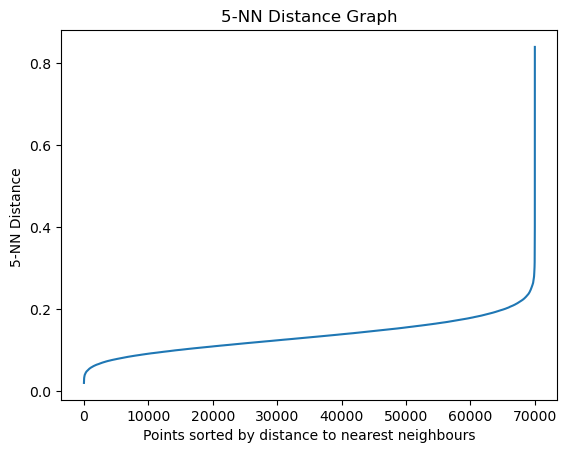

In [64]:
plot_kneighbours(zernike_2_data, n_neighbours)

In [65]:
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

Number of clusters: 1569
[  0   1   2 ... 195 725 291]
Numbers that are not noise: 63443


The most repeated label is 7 with 2340 occurrences.
The least repeated label is 1483 with 1 occurrence.
Cluster density mean: 40.435309114085406
Cluster density variance: 109.82390355539512


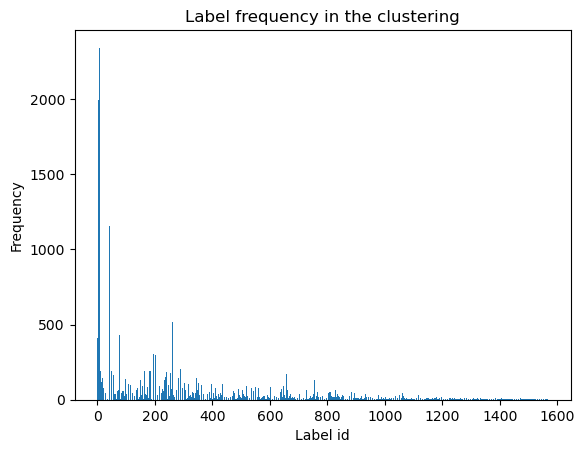

In [66]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

In [67]:
n_neighbours = 4
epsilon = 0.31

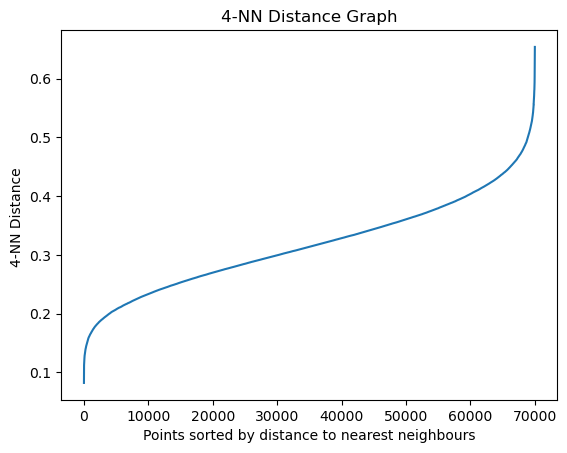

In [68]:
plot_kneighbours(zernike_5_data, n_neighbours)

In [69]:
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

Number of clusters: 1548
[ 0 -1 -1 ...  2 -1  2]
Numbers that are not noise: 46333


The most repeated label is 2 with 34030 occurrences.
The least repeated label is 1536 with 1 occurrence.
Cluster density mean: 29.930878552971578
Cluster density variance: 864.4955548432118


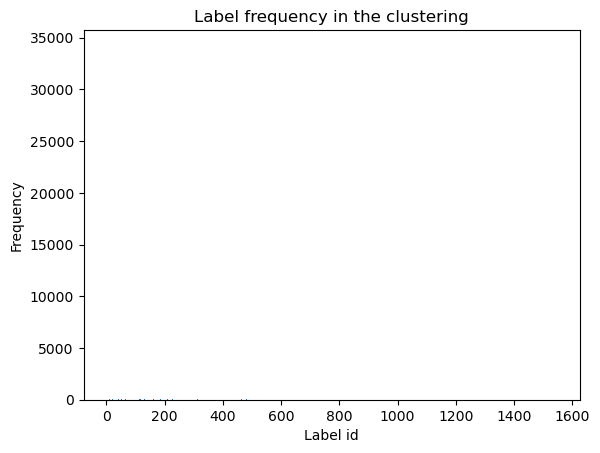

In [70]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

In [71]:
n_neighbours = 4
epsilon = 0.265

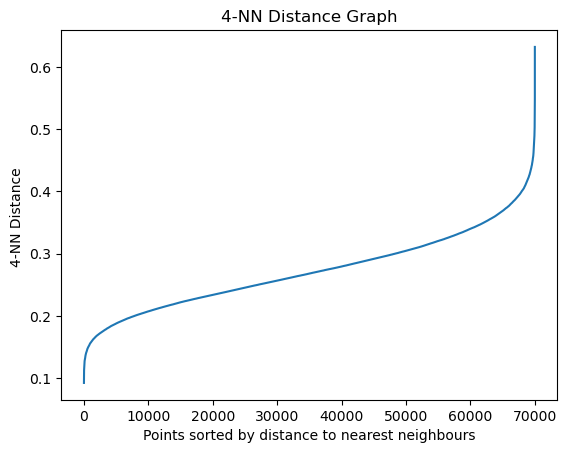

In [72]:
plot_kneighbours(zernike_9_data, n_neighbours)

In [73]:
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

Number of clusters: 1381
[0 0 0 ... 0 0 0]
Numbers that are not noise: 46692


The most repeated label is 0 with 37136 occurrences.
The least repeated label is 1239 with 1 occurrence.
Cluster density mean: 33.81028240405503
Cluster density variance: 998.796957116535


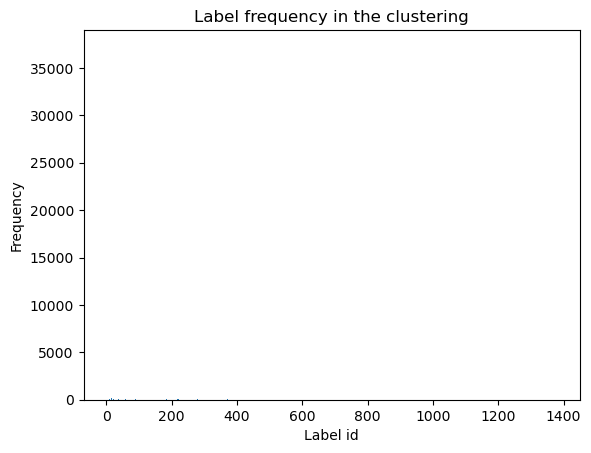

In [74]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

In [75]:
n_neighbours = 4
epsilon = 0.25

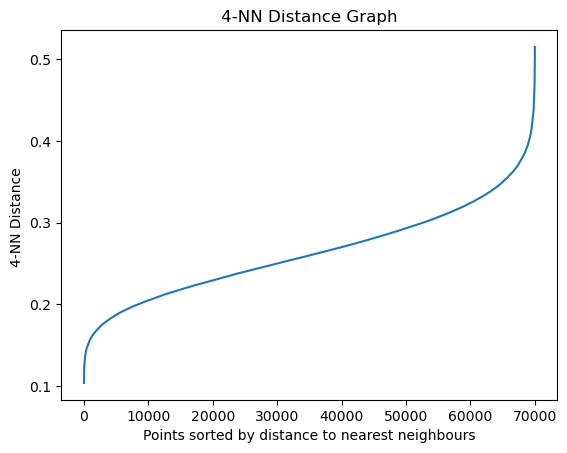

In [76]:
plot_kneighbours(zernike_14_data, n_neighbours)

In [77]:
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

Number of clusters: 1654
[-1  0  0 ... -1  0  0]
Numbers that are not noise: 44133


The most repeated label is 0 with 32643 occurrences.
The least repeated label is 1624 with 1 occurrence.
Cluster density mean: 26.682587666263604
Cluster density variance: 802.2715899028525


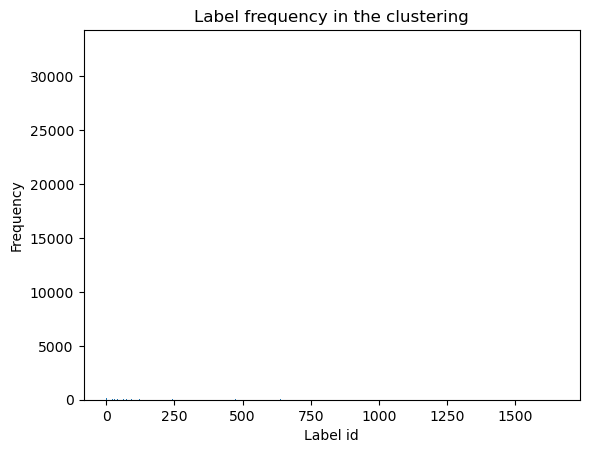

In [78]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

In [79]:
n_neighbours = 4
epsilon = 0.25

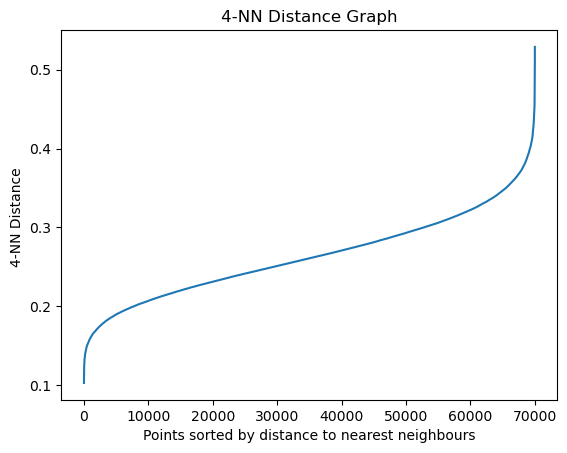

In [81]:
plot_kneighbours(zernike_20_data, n_neighbours)

In [82]:
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

Number of clusters: 1688
[  0 177   0 ...  -1 566  -1]
Numbers that are not noise: 43791


The most repeated label is 0 with 32359 occurrences.
The least repeated label is 1334 with 1 occurrence.
Cluster density mean: 25.942535545023695
Cluster density variance: 787.2449791792008


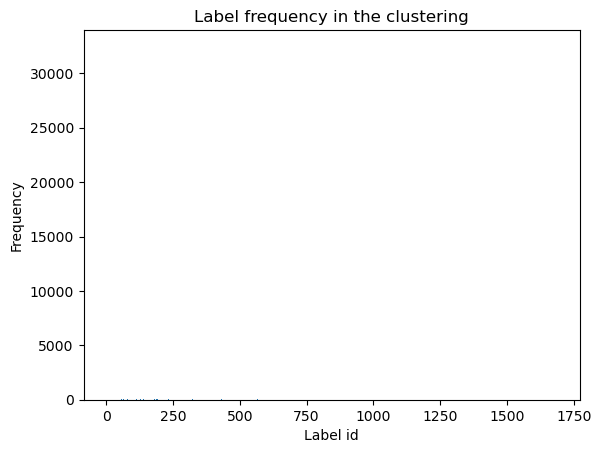

In [83]:
plot_cluster_labels_count(labels_20m)

In [84]:
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_20M_ZERNIKE_PSF_FILE_PATH, labels_20m)

# Cluster Low Dimensionality Predicted PSF intensity

In [61]:
from psf_constants import LOW_DIMENSIONALITY_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_2M_ZERNIKE_PSF_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_5M_ZERNIKE_PSF_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_9M_ZERNIKE_PSF_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_14M_ZERNIKE_PSF_INTENSITY_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_20M_ZERNIKE_PSF_INTENSITY_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [62]:
zernike_2_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)

#### 2 modes

In [63]:
n_neighbours = 5
epsilon = 0.157

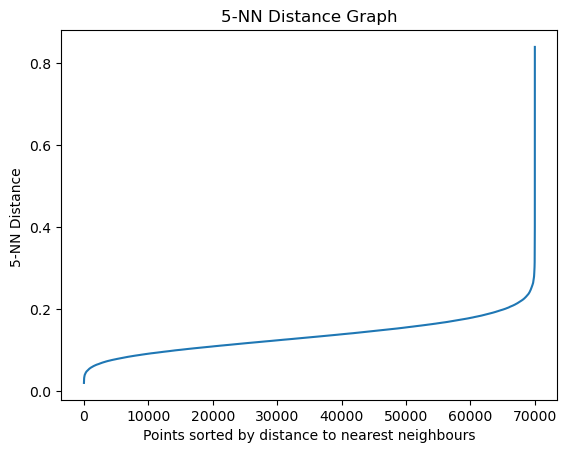

In [64]:
plot_kneighbours(zernike_2_data, n_neighbours)

In [65]:
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

Number of clusters: 1569
[  0   1   2 ... 195 725 291]
Numbers that are not noise: 63443


The most repeated label is 7 with 2340 occurrences.
The least repeated label is 1483 with 1 occurrence.
Cluster density mean: 40.435309114085406
Cluster density variance: 109.82390355539512


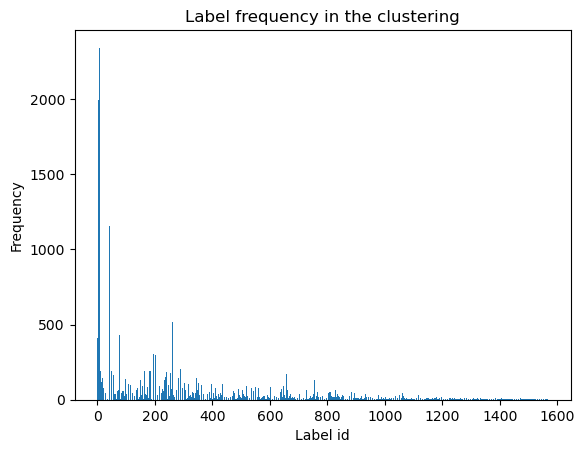

In [66]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

In [67]:
n_neighbours = 4
epsilon = 0.31

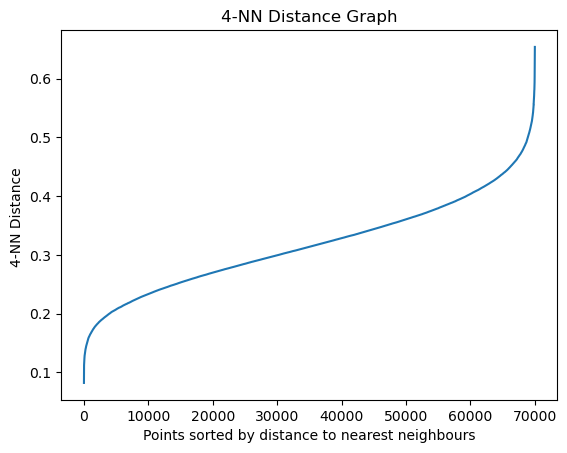

In [68]:
plot_kneighbours(zernike_5_data, n_neighbours)

In [69]:
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

Number of clusters: 1548
[ 0 -1 -1 ...  2 -1  2]
Numbers that are not noise: 46333


The most repeated label is 2 with 34030 occurrences.
The least repeated label is 1536 with 1 occurrence.
Cluster density mean: 29.930878552971578
Cluster density variance: 864.4955548432118


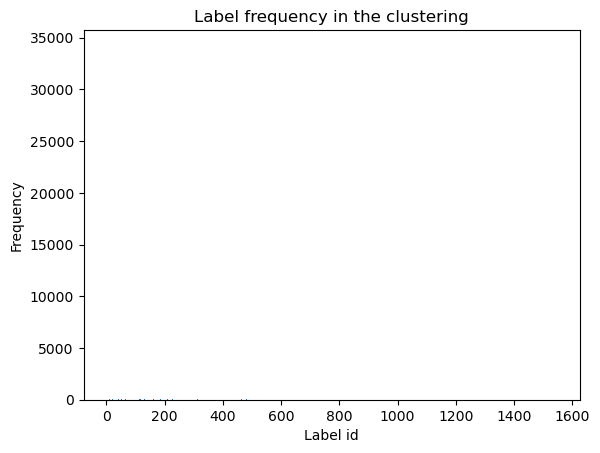

In [70]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

In [71]:
n_neighbours = 4
epsilon = 0.265

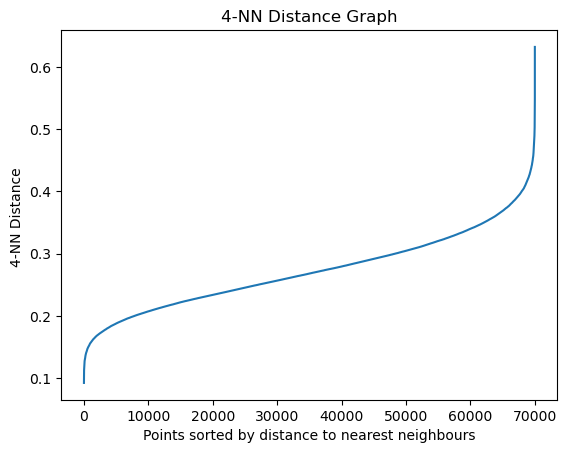

In [72]:
plot_kneighbours(zernike_9_data, n_neighbours)

In [73]:
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

Number of clusters: 1381
[0 0 0 ... 0 0 0]
Numbers that are not noise: 46692


The most repeated label is 0 with 37136 occurrences.
The least repeated label is 1239 with 1 occurrence.
Cluster density mean: 33.81028240405503
Cluster density variance: 998.796957116535


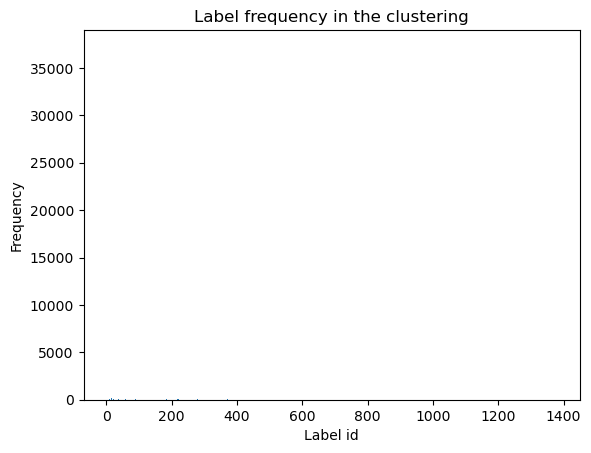

In [74]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

In [75]:
n_neighbours = 4
epsilon = 0.25

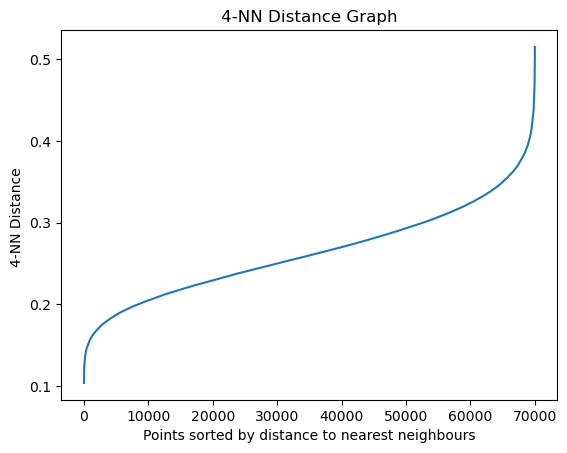

In [76]:
plot_kneighbours(zernike_14_data, n_neighbours)

In [77]:
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

Number of clusters: 1654
[-1  0  0 ... -1  0  0]
Numbers that are not noise: 44133


The most repeated label is 0 with 32643 occurrences.
The least repeated label is 1624 with 1 occurrence.
Cluster density mean: 26.682587666263604
Cluster density variance: 802.2715899028525


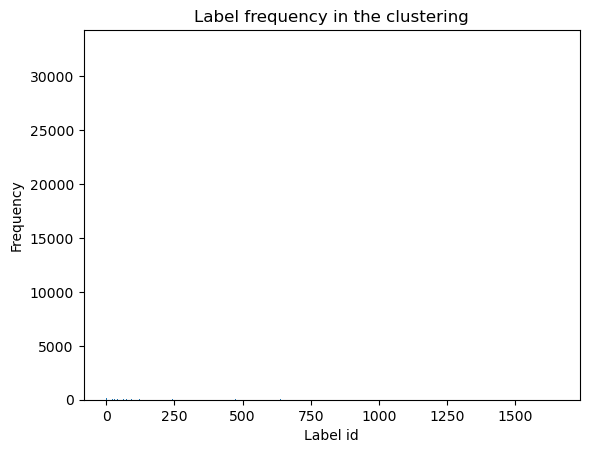

In [78]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

In [79]:
n_neighbours = 4
epsilon = 0.25

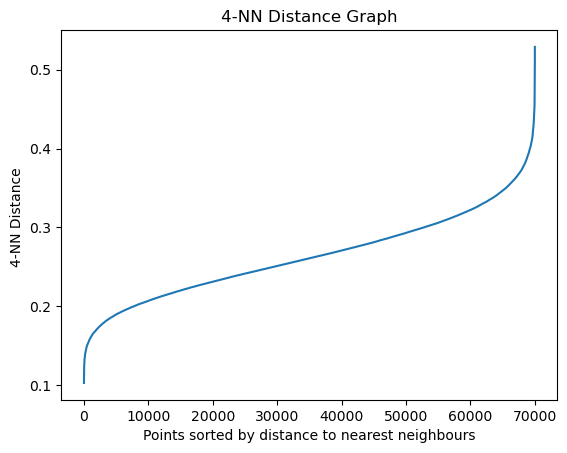

In [81]:
plot_kneighbours(zernike_20_data, n_neighbours)

In [82]:
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

Number of clusters: 1688
[  0 177   0 ...  -1 566  -1]
Numbers that are not noise: 43791


The most repeated label is 0 with 32359 occurrences.
The least repeated label is 1334 with 1 occurrence.
Cluster density mean: 25.942535545023695
Cluster density variance: 787.2449791792008


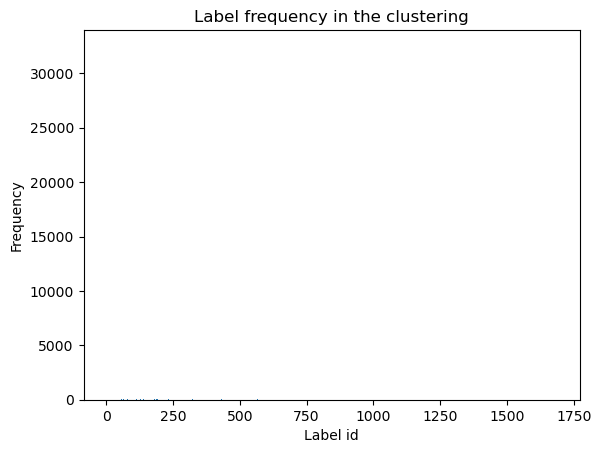

In [83]:
plot_cluster_labels_count(labels_20m)

In [84]:
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_2M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_5M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_9M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_14M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_20M_ZERNIKE_PSF_INTENSITY_FILE_PATH, labels_20m)